In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import sqlite3


In [63]:
# create connection to database

con = sqlite3.connect("db/movies.db")
sql = f"""
   SELECT * FROM movie_data
   """

# bring in db to pandas dataframe
movies = pd.read_sql(sql, con)
movies.head(15)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,production_companies_count,genres_count,popularity,vote_count,vote_average,total_actor_starpower,release_month,holiday_month,tot_noms,tot_wins
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,4.0,4,185.070892,12114.0,7.2,5.334665,12,1,0,0
1,Color,Stephen Sommers,106.0,106.0,208.0,855.0,Jason Flemyng,3000.0,11146409.0,Action|Adventure|Horror|Sci-Fi,...,3.0,4,6.922458,155.0,6.0,10.933174,01,0,0,0
2,Color,Terrence Malick,222.0,150.0,0.0,855.0,Michael Greyeyes,23000.0,12712093.0,Biography|Drama|History|Romance,...,5.0,3,7.694502,336.0,6.4,11.013046,12,1,0,0
3,Color,Brian Robbins,76.0,98.0,48.0,722.0,Joel David Moore,21000.0,61112916.0,Comedy|Family|Fantasy,...,3.0,2,4.878907,138.0,4.5,13.698882,03,0,1,0
4,Color,Brad Peyton,178.0,94.0,62.0,722.0,Dwayne Johnson,14000.0,103812241.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,3.0,3,9.46307,1050.0,5.8,6.475240,01,0,0,0
5,Color,Michael Patrick King,221.0,146.0,127.0,722.0,Liza Minnelli,962.0,95328937.0,Comedy|Drama|Romance,...,4.0,3,7.255991,434.0,5.5,3.409212,05,0,2,1
6,Color,David R. Ellis,231.0,90.0,160.0,852.0,Joel David Moore,963.0,18860403.0,Horror|Thriller,...,1.0,2,6.062425,134.0,4.9,2.816560,09,0,0,0
7,Color,Peter Hyams,174.0,121.0,0.0,595.0,Mark Margolis,1000.0,66862068.0,Action|Fantasy|Horror|Mystery,...,1.0,4,9.62371,488.0,5.5,6.499734,11,1,0,0
8,Color,William Malone,104.0,101.0,37.0,595.0,Jeffrey Combs,2000.0,13208023.0,Crime|Horror|Thriller,...,8.0,2,5.160215,106.0,3.2,3.409212,08,0,0,0
9,Color,Stephen Norrington,184.0,110.0,45.0,595.0,Traci Lords,886.0,70001065.0,Action|Horror,...,4.0,2,15.043454,1950.0,6.5,3.409212,08,0,0,0


# Testing models:
## Prepping the data to be tested by the QDA model

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import MinMaxScaler

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve, average_precision_score, auc


In [54]:
# review columns
for col in movies.columns.sort_values().values:
    print(col)

actor_1_facebook_likes
actor_1_name
actor_1_score
actor_2_facebook_likes
actor_2_name
actor_2_score
actor_3_facebook_likes
actor_3_name
actor_3_score
aspect_ratio
budget
cast_total_facebook_likes
color
content_rating
country
director_facebook_likes
director_name
director_score
duration
facenumber_in_poster
genres
genres_count
gross
gross_margin
holiday_month
imdb_num_code
imdb_score
language
movie_facebook_likes
movie_imdb_link
movie_title
num_critic_for_reviews
num_user_for_reviews
num_voted_users
plot_keywords
popularity
production_companies_count
rating_numeric
release_date
release_month
revenue
success_bins
successful
title_year
tot_noms
tot_wins
total_actor_starpower
vote_average
vote_count


## Make dummy variables for release month

In [64]:
movies_df = pd.get_dummies(movies, columns=["release_month"], prefix=['rel_mon'])
movies_df.head(15)
# new column names for dummy variables are rel_mon_01 for Jan, rel_mon_02 for Feb, etc.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,rel_mon_03,rel_mon_04,rel_mon_05,rel_mon_06,rel_mon_07,rel_mon_08,rel_mon_09,rel_mon_10,rel_mon_11,rel_mon_12
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,1
1,Color,Stephen Sommers,106.0,106.0,208.0,855.0,Jason Flemyng,3000.0,11146409.0,Action|Adventure|Horror|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
2,Color,Terrence Malick,222.0,150.0,0.0,855.0,Michael Greyeyes,23000.0,12712093.0,Biography|Drama|History|Romance,...,0,0,0,0,0,0,0,0,0,1
3,Color,Brian Robbins,76.0,98.0,48.0,722.0,Joel David Moore,21000.0,61112916.0,Comedy|Family|Fantasy,...,1,0,0,0,0,0,0,0,0,0
4,Color,Brad Peyton,178.0,94.0,62.0,722.0,Dwayne Johnson,14000.0,103812241.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
5,Color,Michael Patrick King,221.0,146.0,127.0,722.0,Liza Minnelli,962.0,95328937.0,Comedy|Drama|Romance,...,0,0,1,0,0,0,0,0,0,0
6,Color,David R. Ellis,231.0,90.0,160.0,852.0,Joel David Moore,963.0,18860403.0,Horror|Thriller,...,0,0,0,0,0,0,1,0,0,0
7,Color,Peter Hyams,174.0,121.0,0.0,595.0,Mark Margolis,1000.0,66862068.0,Action|Fantasy|Horror|Mystery,...,0,0,0,0,0,0,0,0,1,0
8,Color,William Malone,104.0,101.0,37.0,595.0,Jeffrey Combs,2000.0,13208023.0,Crime|Horror|Thriller,...,0,0,0,0,0,1,0,0,0,0
9,Color,Stephen Norrington,184.0,110.0,45.0,595.0,Traci Lords,886.0,70001065.0,Action|Horror,...,0,0,0,0,0,1,0,0,0,0


In [93]:
# converting release month dummy variables from unt8 to int64 (repeated for all 12 columns by copy/paste)
movies_df['rel_mon_12'] = movies_df['rel_mon_12'].astype(int)
movies_df.head()
movies_df.dtypes


color                          object
director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_2_name                   object
actor_1_facebook_likes        float64
gross                         float64
genres                         object
actor_1_name                   object
movie_title                    object
num_voted_users                 int64
cast_total_facebook_likes       int64
actor_3_name                   object
facenumber_in_poster          float64
plot_keywords                  object
movie_imdb_link                object
num_user_for_reviews          float64
language                       object
country                        object
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                    float64
aspect_ratio

In [95]:
# review columns in movies_df; note that release_month is missing as it was converted to dummy variables
for col in movies_df.columns.sort_values().values:
    print(col)

actor_1_facebook_likes
actor_1_name
actor_1_score
actor_2_facebook_likes
actor_2_name
actor_2_score
actor_3_facebook_likes
actor_3_name
actor_3_score
aspect_ratio
budget
cast_total_facebook_likes
color
content_rating
country
director_facebook_likes
director_name
director_score
duration
facenumber_in_poster
genres
genres_count
gross
gross_margin
holiday_month
imdb_num_code
imdb_score
language
movie_facebook_likes
movie_imdb_link
movie_title
num_critic_for_reviews
num_user_for_reviews
num_voted_users
plot_keywords
popularity
production_companies_count
rating_numeric
rel_mon_01
rel_mon_02
rel_mon_03
rel_mon_04
rel_mon_05
rel_mon_06
rel_mon_07
rel_mon_08
rel_mon_09
rel_mon_10
rel_mon_11
rel_mon_12
release_date
revenue
success_bins
successful
title_year
tot_noms
tot_wins
total_actor_starpower
vote_average
vote_count


In [99]:
# need to add back in release_month column into df
movies_df["release_month"] = movies["release_month"]
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,rel_mon_04,rel_mon_05,rel_mon_06,rel_mon_07,rel_mon_08,rel_mon_09,rel_mon_10,rel_mon_11,rel_mon_12,release_month
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,1,12
1,Color,Stephen Sommers,106.0,106.0,208.0,855.0,Jason Flemyng,3000.0,11146409.0,Action|Adventure|Horror|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01
2,Color,Terrence Malick,222.0,150.0,0.0,855.0,Michael Greyeyes,23000.0,12712093.0,Biography|Drama|History|Romance,...,0,0,0,0,0,0,0,0,1,12
3,Color,Brian Robbins,76.0,98.0,48.0,722.0,Joel David Moore,21000.0,61112916.0,Comedy|Family|Fantasy,...,0,0,0,0,0,0,0,0,0,03
4,Color,Brad Peyton,178.0,94.0,62.0,722.0,Dwayne Johnson,14000.0,103812241.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01


In [103]:
# review columns in movies_df; release_month is back
for col in movies_df.columns.sort_values().values:
    print(col)



actor_1_facebook_likes
actor_1_name
actor_1_score
actor_2_facebook_likes
actor_2_name
actor_2_score
actor_3_facebook_likes
actor_3_name
actor_3_score
aspect_ratio
budget
cast_total_facebook_likes
color
content_rating
country
director_facebook_likes
director_name
director_score
duration
facenumber_in_poster
genres
genres_count
gross
gross_margin
holiday_month
imdb_num_code
imdb_score
language
movie_facebook_likes
movie_imdb_link
movie_title
num_critic_for_reviews
num_user_for_reviews
num_voted_users
plot_keywords
popularity
production_companies_count
rating_numeric
rel_mon_01
rel_mon_02
rel_mon_03
rel_mon_04
rel_mon_05
rel_mon_06
rel_mon_07
rel_mon_08
rel_mon_09
rel_mon_10
rel_mon_11
rel_mon_12
release_date
release_month
revenue
success_bins
successful
title_year
tot_noms
tot_wins
total_actor_starpower
vote_average
vote_count


In [105]:
#movies_df is now where I want it to be, so save it as movies again and push to sql 
movies = movies_df
movies.head(5)

con = sqlite3.connect("db/movies.db")
movies.to_sql("movie_data", con, if_exists="replace", index=False)
# commit the changes and close the connection
con.commit()
con.close()

In [106]:
# create connection to database to check that the movies_data file was re-written properly (new columns for rel_mon dummy variables and still has release_month)
con = sqlite3.connect("db/movies.db")
sql = f"""
   SELECT * FROM movie_data
   """

# bring in db to pandas dataframe
movieeees = pd.read_sql(sql, con)
movieeees.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,rel_mon_04,rel_mon_05,rel_mon_06,rel_mon_07,rel_mon_08,rel_mon_09,rel_mon_10,rel_mon_11,rel_mon_12,release_month
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,1,12
1,Color,Stephen Sommers,106.0,106.0,208.0,855.0,Jason Flemyng,3000.0,11146409.0,Action|Adventure|Horror|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01
2,Color,Terrence Malick,222.0,150.0,0.0,855.0,Michael Greyeyes,23000.0,12712093.0,Biography|Drama|History|Romance,...,0,0,0,0,0,0,0,0,1,12
3,Color,Brian Robbins,76.0,98.0,48.0,722.0,Joel David Moore,21000.0,61112916.0,Comedy|Family|Fantasy,...,0,0,0,0,0,0,0,0,0,03
4,Color,Brad Peyton,178.0,94.0,62.0,722.0,Dwayne Johnson,14000.0,103812241.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01


In [107]:
# review columns in movieeees to double check; it's all good
for col in movieeees.columns.sort_values().values:
    print(col)

actor_1_facebook_likes
actor_1_name
actor_1_score
actor_2_facebook_likes
actor_2_name
actor_2_score
actor_3_facebook_likes
actor_3_name
actor_3_score
aspect_ratio
budget
cast_total_facebook_likes
color
content_rating
country
director_facebook_likes
director_name
director_score
duration
facenumber_in_poster
genres
genres_count
gross
gross_margin
holiday_month
imdb_num_code
imdb_score
language
movie_facebook_likes
movie_imdb_link
movie_title
num_critic_for_reviews
num_user_for_reviews
num_voted_users
plot_keywords
popularity
production_companies_count
rating_numeric
rel_mon_01
rel_mon_02
rel_mon_03
rel_mon_04
rel_mon_05
rel_mon_06
rel_mon_07
rel_mon_08
rel_mon_09
rel_mon_10
rel_mon_11
rel_mon_12
release_date
release_month
revenue
success_bins
successful
title_year
tot_noms
tot_wins
total_actor_starpower
vote_average
vote_count


In [109]:
# change movieeees back to movies

movies = movieeees
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,rel_mon_04,rel_mon_05,rel_mon_06,rel_mon_07,rel_mon_08,rel_mon_09,rel_mon_10,rel_mon_11,rel_mon_12,release_month
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,1,12
1,Color,Stephen Sommers,106.0,106.0,208.0,855.0,Jason Flemyng,3000.0,11146409.0,Action|Adventure|Horror|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01
2,Color,Terrence Malick,222.0,150.0,0.0,855.0,Michael Greyeyes,23000.0,12712093.0,Biography|Drama|History|Romance,...,0,0,0,0,0,0,0,0,1,12
3,Color,Brian Robbins,76.0,98.0,48.0,722.0,Joel David Moore,21000.0,61112916.0,Comedy|Family|Fantasy,...,0,0,0,0,0,0,0,0,0,03
4,Color,Brad Peyton,178.0,94.0,62.0,722.0,Dwayne Johnson,14000.0,103812241.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,01


In [110]:
# create table for model purposes
# Note that I haven't included any predictors that won't be known before a movie release
movies = movies[["duration","rating_numeric", "successful","director_score","production_companies_count",
                 "total_actor_starpower","release_month","holiday_month", "rel_mon_01", 
                 "rel_mon_02", "rel_mon_03", "rel_mon_04", "rel_mon_05", "rel_mon_06", "rel_mon_07", 
                 "rel_mon_08", "rel_mon_09", "rel_mon_10", "rel_mon_11", "rel_mon_12", "tot_wins","tot_noms"]]
#movies_df = movies_df.dropna()
movies.head(10)


,duration,rating_numeric,successful,director_score,production_companies_count,total_actor_starpower,release_month,holiday_month,rel_mon_01,rel_mon_02,...,rel_mon_05,rel_mon_06,rel_mon_07,rel_mon_08,rel_mon_09,rel_mon_10,rel_mon_11,rel_mon_12,tot_wins,tot_noms
0,178.0,3,1,3.091853,4.0,5.334665,12,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,106.0,4,0,1.766773,3.0,10.933174,01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,150.0,3,0,1.325080,5.0,11.013046,12,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,98.0,2,1,2.650160,3.0,13.698882,03,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,94.0,2,1,1.325080,3.0,6.475240,01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,146.0,4,0,0.441693,4.0,3.409212,05,0,0,0,...,1,0,0,0,0,0,0,0,1,2
6,90.0,3,0,2.650160,1.0,2.816560,09,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,121.0,4,0,2.208466,1.0,6.499734,11,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,101.0,4,0,0.883387,8.0,3.409212,08,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,110.0,4,1,0.883387,4.0,3.409212,08,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [111]:
movies["successful"].value_counts()

1    1950
0    1687
Name: successful, dtype: int64

# Set features (X) and y, create model, make train and testing data

In [124]:
# Assign X (data) and y (target)
# Change X if you want to test other parameters; this set of 9 is the final set our group decided to test
X = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]
X2 = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower", "rel_mon_01", 
             "rel_mon_02", "rel_mon_03", "rel_mon_04", "rel_mon_05", "rel_mon_06", "rel_mon_07", 
             "rel_mon_08", "rel_mon_09", "rel_mon_10", "rel_mon_11", "rel_mon_12"]]

y = movies["successful"].values.reshape(-1, 1)
print(X.shape, y.shape)
print(X2.shape, y.shape)




(3637, 8) (3637, 1)
(3637, 20) (3637, 1)


In [157]:
# split the training and testing data
# X contains the final 8 parameters; X2 contains those 8, plus 12 dummy variables for release month
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1158, train_size=0.80, stratify=y)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=1158, train_size=0.80, stratify=y)


# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X2_scaler = StandardScaler().fit(X2_train)

# Create a MinMax Scaler as an alternative
Xm_scaler = MinMaxScaler(feature_range=[0, 1])


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data w

In [126]:
pd.DataFrame(y_test)[0].value_counts()

1    390
0    338
Name: 0, dtype: int64

In [161]:
# transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

Xm_train_scaled = Xm_scaler.fit_transform(X_train)
Xm_test_scaled = Xm_scaler.fit_transform(X_test)

Xm2_train_scaled = Xm_scaler.fit_transform(X2_train)
Xm2_test_scaled = Xm_scaler.fit_transform(X2_test)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all conver

# Trying the PCA analysis with QDA model (with X for 8 final parameters)

8 final parameters: 
X = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower"]]

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.svm import SVC

In [128]:
# define model; CHANGE FOR YOUR MODEL
# for SVC:
# modelSVC = SVC(C=5, gamma=0.1, kernel='linear')

model = QuadraticDiscriminantAnalysis()


In [147]:
# Function to test PCA with a range of component values

for n in range(2,9):
    
    pca = decomposition.PCA(n_components = n)
    pca.fit(X_train_scaled, y_train)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    model.fit(X_train_pca, y_train)
    print("n="+str(n),model.score(X_test_pca, y_test),"")

n=2 0.5302197802197802 
n=3 0.5357142857142857 
n=4 0.5412087912087912 
n=5 0.5563186813186813 
n=6 0.5576923076923077 
n=7 0.5631868131868132 
n=8 0.5604395604395604 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [159]:
# Function to test PCA with 8 features, but this time with the MaxMin scaler (Xm)

for n in range(2,9):
    
    pca = decomposition.PCA(n_components = n)
    pca.fit(Xm_train_scaled, y_train)
    Xm_train_pca = pca.transform(Xm_train_scaled)
    Xm_test_pca = pca.transform(Xm_test_scaled)
    
    model.fit(Xm_train_pca, y_train)
    print("n="+str(n),model.score(Xm_test_pca, y_test),"")


n=2 0.5357142857142857 
n=3 0.5274725274725275 
n=4 0.5494505494505495 
n=5 0.5686813186813187 
n=6 0.5782967032967034 
n=7 0.5755494505494505 
n=8 0.5837912087912088 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [164]:
pca

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [165]:
pca.explained_variance_

array([0.14797809, 0.03923514, 0.030461  , 0.0223891 , 0.00761436,
       0.00591483, 0.0049356 , 0.00073159])

In [166]:
pca.explained_variance_ratio_

# WITH STADARD SCALER
# array([0.29277312, 0.15479833, 0.13686132, 0.12188198, 0.10441453,
#       0.08916134, 0.07772851, 0.02238088])

# with MinMax Scaler
# array([0.57077163, 0.15133529, 0.11749221, 0.0863578 , 0.02936961,
#        0.02281432, 0.0190373 , 0.00282185])

array([0.57077163, 0.15133529, 0.11749221, 0.0863578 , 0.02936961,
       0.02281432, 0.0190373 , 0.00282185])

In [133]:
X_train_scaled

array([[-0.04891249,  0.86840406,  0.59554403, ..., -0.35104606,
         0.46143871,  0.32595804],
       [ 0.39352046,  0.86840406, -0.60204865, ..., -0.35104606,
        -0.44615102,  0.12671206],
       [-0.49134544, -0.24005904, -0.84156719, ..., -0.35104606,
        -0.44615102, -0.80268005],
       ...,
       [ 0.34927716,  0.86840406, -0.12301158, ..., -0.35104606,
        -0.44615102,  0.82302606],
       [-0.75680521,  0.86840406, -0.12301158, ..., -0.35104606,
         0.00764385, -0.59627092],
       [-0.57983203,  0.86840406, -0.84156719, ..., -0.35104606,
        -0.44615102,  1.02943519]])

In [134]:
import numpy as np

In [135]:
i =np.identity(len(X_train_scaled[0]))
i

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [136]:
pd.DataFrame(pca.transform(i))

,0,1,2,3,4,5,6,7
0,0.275560,-0.550189,0.148211,0.036374,-0.128803,0.714336,-0.266117,0.019580
1,0.050555,-0.311145,-0.576980,-0.546813,-0.478846,-0.149051,0.131198,-0.000260
2,0.267529,-0.519011,0.052634,-0.098121,0.612315,-0.222377,0.470701,-0.026785
3,0.103974,-0.244143,-0.374273,0.827048,-0.234782,-0.198839,0.099228,0.031457
4,0.178886,-0.183985,0.695192,-0.020595,-0.521072,-0.411810,0.096543,-0.003040
5,0.546789,0.351160,-0.044637,-0.026591,-0.058766,0.135884,0.256246,0.698162
6,0.554341,0.336663,-0.065403,0.012596,-0.083566,0.136983,0.198888,-0.713879
7,0.448171,-0.031571,-0.112760,-0.068900,0.205210,-0.414370,-0.752345,0.029102


In [137]:
# These column names are equivalent to rows 0-9 in pca.transform above
X.columns

Index(['duration', 'rating_numeric', 'director_score',
       'production_companies_count', 'holiday_month', 'tot_wins', 'tot_noms',
       'total_actor_starpower'],
      dtype='object')

#### Analysis on the PCA with 8 features, using MinMax scaler

In [167]:
Xm_train_scaled

array([[0.24573379, 0.8       , 0.25      , ..., 0.        , 0.05405405,
        0.22155722],
       [0.27986348, 0.8       , 0.04166667, ..., 0.        , 0.        ,
        0.18831306],
       [0.2116041 , 0.6       , 0.        , ..., 0.        , 0.        ,
        0.03324416],
       ...,
       [0.27645051, 0.8       , 0.125     , ..., 0.        , 0.        ,
        0.30449293],
       [0.19112628, 0.8       , 0.125     , ..., 0.        , 0.02702703,
        0.06768348],
       [0.20477816, 0.8       , 0.        , ..., 0.        , 0.        ,
        0.33893225]])

In [168]:
i =np.identity(len(Xm_train_scaled[0]))
i

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [169]:
pd.DataFrame(pca.transform(i))

,0,1,2,3,4,5,6,7
0,-0.138401,-0.399766,0.493377,-0.050714,0.083028,0.244826,0.763405,0.014095
1,-0.221278,-0.053869,-0.412216,-0.019734,-0.161966,-0.026023,-0.195120,-0.002552
2,-0.118120,0.107816,0.814677,-0.690774,-0.204856,-0.061893,-0.262031,-0.009758
3,-0.185997,-0.469822,0.489846,0.007272,0.815099,-0.198352,-0.357796,0.019317
4,0.815625,-0.584317,0.389030,-0.013756,-0.145655,-0.058453,-0.184738,-0.002383
5,-0.153784,-0.405986,0.544045,0.137137,-0.103564,0.675777,-0.407237,0.623137
6,-0.157780,-0.421434,0.532286,0.126194,-0.081861,0.532479,-0.342363,-0.781951
7,-0.121640,0.056239,0.763875,0.693150,-0.235473,-0.298548,-0.113276,0.010996


In [170]:
# These column names are equivalent to rows 0-9 in pca.transform above
X.columns

Index(['duration', 'rating_numeric', 'director_score',
       'production_companies_count', 'holiday_month', 'tot_wins', 'tot_noms',
       'total_actor_starpower'],
      dtype='object')

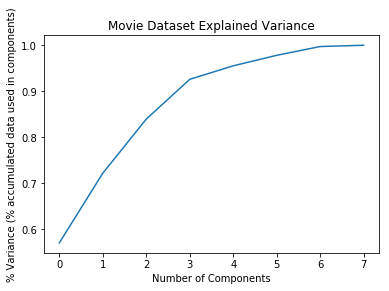

<Figure size 432x288 with 0 Axes>

In [172]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('% Variance (% accumulated data used in components)') #for each component
plt.title('Movie Dataset Explained Variance')
plt.show()
plt.savefig("movie_pca_variance.png")

# Trying the PCA analysis with QDA model (with X for 20 final parameters)

20 final parameters (the final 8, plus 12 dummy variables for release month): 
X2 = movies[['duration','rating_numeric', 'director_score','production_companies_count',
            "holiday_month","tot_wins","tot_noms", "total_actor_starpower", "rel_mon_01", 
             "rel_mon_02", "rel_mon_03", "rel_mon_04", "rel_mon_05", "rel_mon_06", "rel_mon_07", 
             "rel_mon_08", "rel_mon_09", "rel_mon_10", "rel_mon_11", "rel_mon_12"]]


In [153]:
# Function to test PCA with 20 features
for n in range(2,10):
    
    pca2 = decomposition.PCA(n_components = n)
    pca2.fit(X2_train_scaled, y_train)
    X2_train_pca = pca2.transform(X2_train_scaled)
    X2_test_pca = pca2.transform(X2_test_scaled)
    
    model.fit(X2_train_pca, y_train)
    print("n="+str(n),model.score(X2_test_pca, y_test),"")

n=2 0.5274725274725275 
n=3 0.5247252747252747 
n=4 0.5508241758241759 
n=5 0.5563186813186813 
n=6 0.5398351648351648 
n=7 0.5288461538461539 
n=8 0.5439560439560439 
n=9 0.5247252747252747 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [163]:
# Function to test PCA with 20 features, using MinMAx scaler

for n in range(2,10):
    
    pca2 = decomposition.PCA(n_components = n)
    pca2.fit(Xm2_train_scaled, y_train)
    Xm2_train_pca = pca2.transform(Xm2_train_scaled)
    Xm2_test_pca = pca2.transform(Xm2_test_scaled)
    
    model.fit(Xm2_train_pca, y_train)
    print("n="+str(n),model.score(Xm2_test_pca, y_test),"")

n=2 0.5412087912087912 
n=3 0.554945054945055 
n=4 0.5357142857142857 
n=5 0.5357142857142857 
n=6 0.5357142857142857 
n=7 0.5164835164835165 
n=8 0.5288461538461539 
n=9 0.5357142857142857 


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [154]:
pca2.explained_variance_

array([2.59648467, 1.89205744, 1.27220152, 1.23580501, 1.11976883,
       1.11569051, 1.09280359, 1.0912032 , 1.08727258])

In [141]:
pca2.explained_variance_ratio_

array([0.12977961, 0.09457035, 0.06358821, 0.06176901, 0.05596919,
       0.05576535, 0.0546214 , 0.0545414 , 0.05434494])

In [142]:
X2_train_scaled

array([[-0.04891249,  0.86840406,  0.59554403, ..., -0.31724314,
        -0.27893834, -0.34474071],
       [ 0.39352046,  0.86840406, -0.60204865, ..., -0.31724314,
        -0.27893834, -0.34474071],
       [-0.49134544, -0.24005904, -0.84156719, ..., -0.31724314,
        -0.27893834, -0.34474071],
       ...,
       [ 0.34927716,  0.86840406, -0.12301158, ..., -0.31724314,
        -0.27893834, -0.34474071],
       [-0.75680521,  0.86840406, -0.12301158, ..., -0.31724314,
        -0.27893834, -0.34474071],
       [-0.57983203,  0.86840406, -0.84156719, ..., -0.31724314,
        -0.27893834, -0.34474071]])

In [143]:
i =np.identity(len(X2_train_scaled[0]))
i

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [144]:
pd.DataFrame(pca2.transform(i))

,0,1,2,3,4,5,6,7,8
0,0.274609,0.027787,-0.468177,0.008122,-0.075764,-0.010425,-0.070138,0.013785,0.054621
1,-0.000728,0.138417,-0.299999,-0.481425,-0.004446,-0.195618,-0.028291,0.038890,0.030247
2,0.237279,0.099498,-0.465912,0.207974,-0.067457,-0.130798,0.016189,0.031961,0.064894
3,0.058585,0.135363,-0.302794,-0.035921,0.302471,0.194402,0.010660,0.035886,0.004998
4,0.415087,-0.530368,0.040869,-0.069913,0.019860,0.006350,0.007223,0.009471,0.008457
5,0.424991,0.358281,0.318365,-0.019032,0.025046,0.026254,0.049486,-0.036317,-0.037674
6,0.430731,0.368772,0.292647,-0.031240,0.035715,0.023725,0.053221,-0.040222,-0.048200
7,0.351258,0.280817,-0.032064,0.013870,-0.022626,-0.022275,-0.002518,0.095890,-0.055168
8,-0.109191,0.003444,0.282496,-0.146351,0.167461,0.046369,-0.055669,-0.286525,-0.270029
9,-0.062670,0.060830,-0.026736,0.010727,0.261174,0.074065,-0.116281,0.191705,-0.195708


In [145]:
# These column names are equivalent to rows 0-9 in pca.transform above
X2.columns

Index(['duration', 'rating_numeric', 'director_score',
       'production_companies_count', 'holiday_month', 'tot_wins', 'tot_noms',
       'total_actor_starpower', 'rel_mon_01', 'rel_mon_02', 'rel_mon_03',
       'rel_mon_04', 'rel_mon_05', 'rel_mon_06', 'rel_mon_07', 'rel_mon_08',
       'rel_mon_09', 'rel_mon_10', 'rel_mon_11', 'rel_mon_12'],
      dtype='object')

# Current best QDA model:
## With PCA on the final 8 parameters and 7 prinicipal components
## Gives test score of 0.563
